# Implementation of Naive Bayes Algorithm

In [1]:
# Creating Dummy Dataset

import numpy as np
from sklearn.datasets import make_classification

# Generating a synthetic dataset with outliers

X,y = make_classification(n_samples=1000,n_features=10, random_state=42)

# Adding outliers

outliers = np.random.normal(loc=10, scale=5, size=(50,10))
X= np.vstack((X,outliers))
y = np.concatenate((y,np.ones(50))) # Assigning outliers class=1

# Shuffle the data
shuffle_indices = np.random.permutation(X.shape[0])

X = X[shuffle_indices]
y = y[shuffle_indices]

In [11]:
# Creating a Dataframe
import pandas as pd

df = pd.DataFrame(X, columns = [f"Feature_{i}" for i in range(10)])
df["Target"] = y
df.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Target
0,-0.463023,-0.231301,-1.050694,-0.576420,0.861437,0.251317,2.538034,-0.699495,-1.584227,1.471035,1.0
1,-0.271618,0.632454,-0.692895,-0.474178,-0.852387,0.475366,1.722619,1.609521,-1.179412,-0.771772,1.0
2,0.148375,-2.077120,0.328198,-0.235274,-1.353755,0.734477,-0.787362,-1.544936,0.479906,2.145825,0.0
3,0.681272,-0.144879,0.724674,0.043041,0.135859,-0.052505,-1.226054,-0.190446,-0.352381,1.022841,0.0
4,-0.100303,-0.168385,0.296444,-0.326012,-0.510989,-2.553550,-1.050735,-0.153905,1.369050,0.390366,0.0


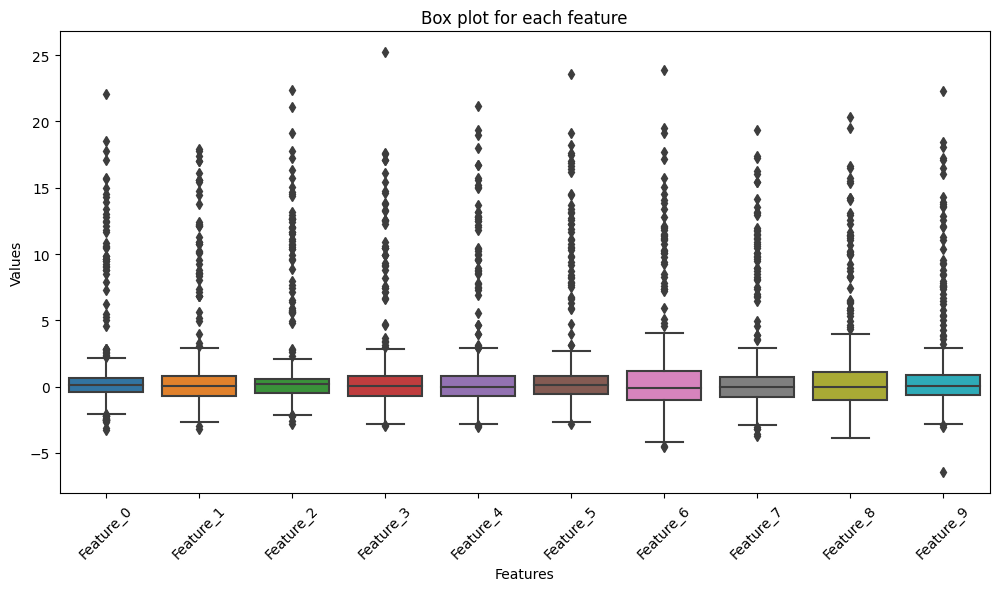

In [12]:
# Plotting Outliers

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting boxplots for each features

plt.figure(figsize=(12,6))
sns.boxplot(data=df.iloc[:,:-1])
plt.title("Box plot for each feature")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

## Now applying Naive Bayes algorithm to the dataset

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [14]:
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [16]:
# Train the naive bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6904761904761905
